## Hypothesis
To predict the incentive level requested to program dishwasher after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [108]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       3       4       4       6       7     183 


  1   2   3   4   5   6   7 
 51  53  64 121  37 118  35 

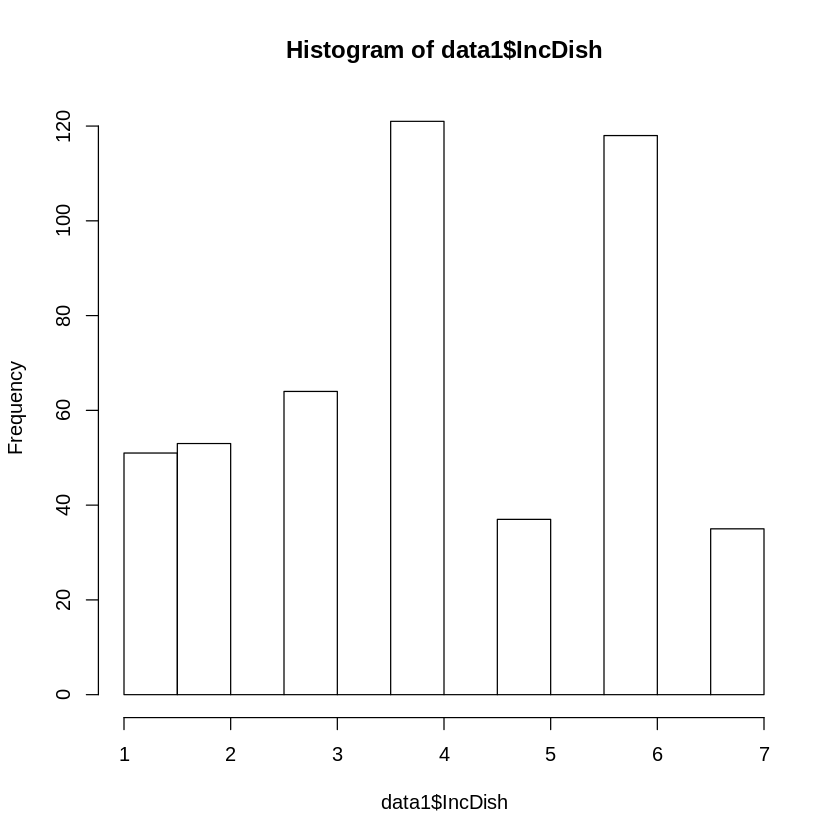

In [109]:
summary(data1$IncDish)
table(data1$IncDish)
hist(data1$IncDish)

In [110]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [111]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 106
[1] 436 106


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     6.0     7.0 


  1   2   3   4   5   6   7 
 46  49  58 115  32 106  30 

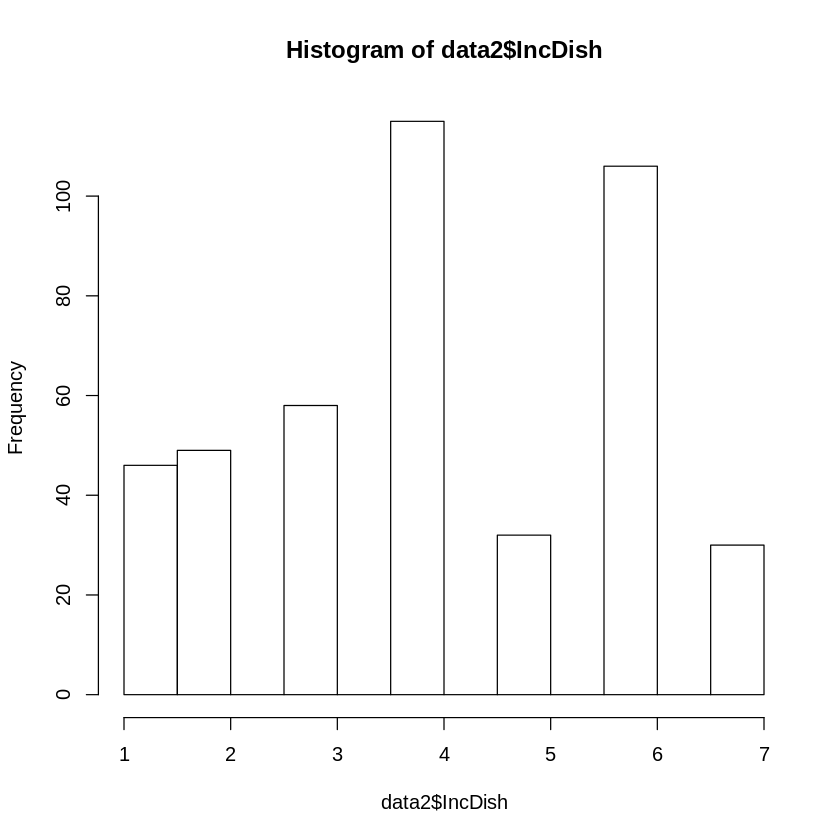

In [112]:
summary(data2$IncDish)
table(data2$IncDish)
hist(data2$IncDish)

In [113]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

In [114]:
#names(data2)
#These are only variables we really care about
IVS = IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Income",
"Educ",
"MC",
"EnergyC",
"PBC",
"SubNorm",
"HabitC",
"ConvB1",
"CashYN")

In [115]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"        "CashYN"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Gender"     "HabitC"     "HouseholdS" "Income"     "MC"        
[11] "OwnRent"    "PBC"        "Political"  "SqftCate"   "SubNorm"

In [116]:
data1 <- data2[, which(names(data2) %in% c("IncDish",IVS))];
sort(names(data1))

[1] "Age"        "CashYN"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Gender"     "HabitC"     "HouseholdS" "IncDish"    "Income"    
[11] "MC"         "OwnRent"    "PBC"        "Political"  "SqftCate"  
[16] "SubNorm"

In [117]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [118]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [119]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncDish"    "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Income"     "Educ"      
[11] "EnergyC"    "PBC"        "CashYN"     "MC"         "SubNorm"   
[16] "HabitC"

In [120]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [121]:
hiCor(data2,.7)

<0 x 0 matrix>

In [122]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.15
    ConvB1 Gender EnergyC   PBC    MC SubNorm HabitC
PC1   0.44  -0.21   -0.39 -0.34 -0.41   -0.35  -0.28
[1] 0.29
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.39    -0.5    -0.52      -0.25  -0.38
[1] 0.38
    IncDish Gender HouseholdS Income  Educ PBC SubNorm HabitC
PC3    0.33   0.31       0.39  -0.28 -0.58 0.2   -0.21  -0.21
[1] 0.45
    Gender Political EnergyC   PBC HabitC
PC4   0.46      0.56    0.41 -0.29  -0.35
[1] 0.52
    IncDish  Age HouseholdS Political
PC5    0.58 0.51      -0.45      0.24
[1] 0.59
     Educ CashYN HabitC
PC6 -0.21  -0.85   0.27
[1] 0.65
    IncDish ConvB1 Gender Political Income   PBC CashYN SubNorm
PC7    0.23   0.32   0.33     -0.43  -0.23 -0.36  -0.25    0.48
[1] 0.7
    IncDish  Age Gender HouseholdS Political Income  Educ   PBC CashYN
PC8   -0.58 0.36   0.24      -0.32     -0.33  -0.23 -0.22 -0.25   0.22
[1] 0.75
    Political  Educ   PBC CashYN   MC HabitC
PC9      0.23 -0.26 -0.22   0.28 -0.4    0.7
[1] 0.8
     ConvB1 Gender Educ 

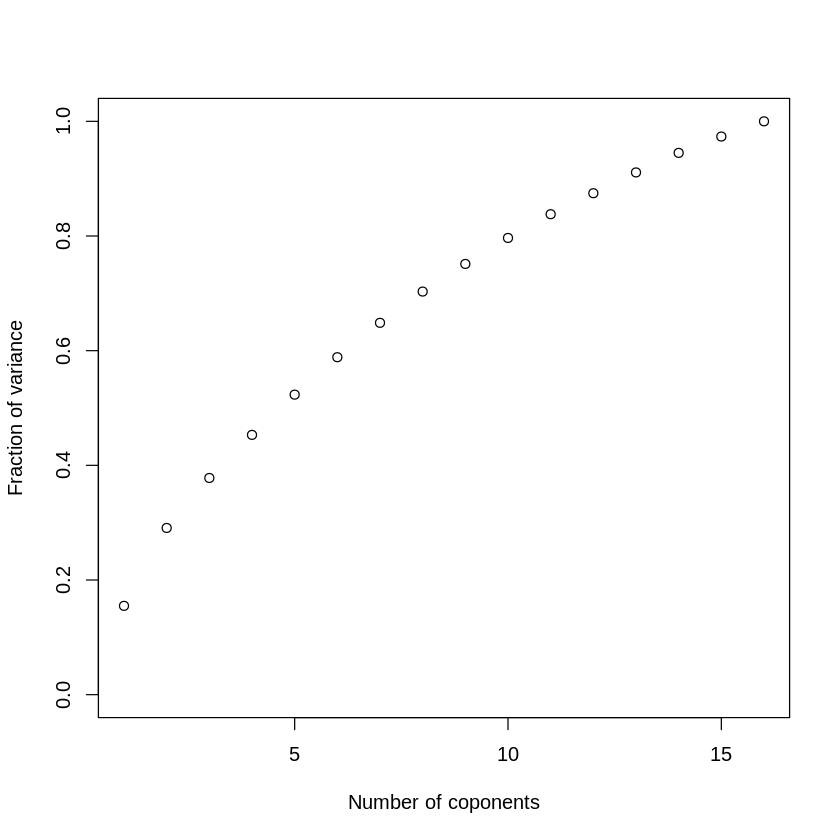

In [123]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [124]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [125]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,6,0.38
ConvB1,2,0.33
OwnRent,5,0.32
MC,14,0.28
EnergyC,11,0.26
Income,9,0.23
SubNorm,15,0.21
HouseholdS,7,0.20
Age,3,0.19
PBC,12,0.18
HabitC,16,0.17


In [126]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [127]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c("Age","Gender","OwnRent","SqftCate","HouseholdS","Political","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitC","ConvB1")

fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [128]:
table(data2[,"IncDish"])


  1   2   3   4   5   6   7 
 46  49  58 115  32 106  30 

In [129]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.46  -1.26  -0.03   1.46   3.87 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.948266   1.066254    1.83   0.0684 . 
Age          0.027011   0.008404    3.21   0.0014 **
Gender       0.222115   0.178643    1.24   0.2144   
OwnRent     -0.139139   0.195851   -0.71   0.4778   
SqftCate     0.086307   0.098281    0.88   0.3804   
HouseholdS   0.119599   0.077043    1.55   0.1213   
Political    0.079615   0.105663    0.75   0.4516   
Income      -0.090933   0.050686   -1.79   0.0735 . 
Educ        -0.000901   0.082575   -0.01   0.9913   
MC           0.109468   0.092778    1.18   0.2387   
EnergyC     -0.170880   0.067499   -2.53   0.0117 * 
PBC          0.158733   0.100229    1.58   0.1140   
SubNorm     -0.022280   0.069014   -0.32   0.7470   
HabitC      -0.019084   0.066463   -0.29   0.7741   
ConvB1       0.126741   0.083504    1.52   0.1298   
---
Signif. c

In [130]:
IndepPred = c("Age","Gender","OwnRent","SqftCate","HouseholdS","Political","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitC","ConvB1","CashYN")

fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [131]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.475 -1.254 -0.039  1.451  3.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.73958    1.10739    1.57   0.1170   
Age          0.02670    0.00842    3.17   0.0016 **
Gender       0.22497    0.17880    1.26   0.2090   
OwnRent     -0.12679    0.19675   -0.64   0.5196   
SqftCate     0.08827    0.09838    0.90   0.3701   
HouseholdS   0.11895    0.07710    1.54   0.1236   
Political    0.08287    0.10583    0.78   0.4340   
Income      -0.09236    0.05076   -1.82   0.0695 . 
Educ        -0.00204    0.08264   -0.02   0.9803   
MC           0.10581    0.09298    1.14   0.2557   
EnergyC     -0.17261    0.06758   -2.55   0.0110 * 
PBC          0.15826    0.10029    1.58   0.1153   
SubNorm     -0.02248    0.06906   -0.33   0.7449   
HabitC      -0.01659    0.06660   -0.25   0.8034   
ConvB1       0.12985    0.08367    1.55   0.1214   
CashYNTRUE   0.22673    0.322